In [1]:
import os
import pandas as pd
import numpy as np
import sklearn as sl
import keras


Using TensorFlow backend.


In [2]:
os.chdir('G:\\Machine learning\\capstone')

In [192]:
data = pd.read_csv('sampletelecomfinal.csv')

In [4]:
data.shape

(13259, 79)

In [119]:
data.isnull().sum()[data.isnull().sum()>2000].index

Index(['income', 'dwlltype', 'dwllsize', 'mailordr', 'occu1', 'numbcars',
       'retdays', 'wrkwoman', 'solflag', 'proptype', 'mailresp', 'cartype',
       'children', 'div_type'],
      dtype='object')

In [355]:
data1 = data.drop(data.isnull().sum()[data.isnull().sum()>2000].index,axis=1) 
#such a large percentage of missing values (>2000) should not be estimated, so dropped.

In [208]:
data1.isnull().sum()[data1.isnull().sum() != 0]

Series([], dtype: int64)

In [ ]:
# Removing unnecessary features (features which have consistent values) and NA fields

In [356]:

data1.drop(['change_mou','Customer_ID','csa'], inplace = True, axis = 1)

In [357]:
data1 = data1.dropna(subset = ['marital','area','avg6mou','mou_Mean'])

In [358]:
data1['overage_rev_ratio'] = data1['ovrrev_Mean']/ data1['totrev']

In [359]:
data1['mou_minute_n'] = data1['mou_Mean']/data1['mou_Range']

In [360]:
data1 = data1.replace(np.inf, np.nan)

In [361]:
data1.drop(['ovrrev_Mean','rev_Range','mou_Range','drop_vce_Range','datovr_Range'],inplace = True, axis=1)

In [362]:
data1 = data1.dropna(subset = ['mou_minute_n'])

In [63]:
data1.groupby('hnd_webcap')['hnd_webcap'].describe()

,count,unique,top,freq
hnd_webcap,,,,
UNKW,37,1,UNKW,37
WC,1670,1,WC,1670
WCMB,9729,1,WCMB,9729


In [363]:
data1.drop(['hnd_webcap'], inplace = True, axis = 1)
# Most of them belong to WCMB, less variance so not much usefull

In [65]:
data1.groupby('prizm_social_one')['prizm_social_one'].describe()

,count,unique,top,freq
prizm_social_one,,,,
C,2144,1,C,2144
R,619,1,R,619
S,4087,1,S,4087
T,1890,1,T,1890
U,3067,1,U,3067


In [364]:
data1.fillna(value={'prizm_social_one' : 'U'}, inplace=True)
# NA values can be estimated as U or C as they are a majority and almost similar in nature 

In [365]:
data1.fillna(value={'hnd_price' : data1['hnd_price'].mean()}, inplace=True)

In [366]:
# Bucketing
def cat(a):
    for i in a:
        if ord(i[:1])<=ord('G'):
            
            return 'low'
        else:
            if ord('G')<ord(i[:1])<=ord('M'):
                
                return 'medium'
            else:
                if ord('M')<ord(i[:1])<=ord('S'):
                    return 'high'
                else:
                    return 'very high'                

   
                                        
data1['crclscod_n'] = data1['crclscod'].map(cat)                              

In [367]:
data1.drop('crclscod',inplace=True,axis = 1)

In [368]:
data1[data1.dtypes[data1.dtypes == object].index].head()

,asl_flag,prizm_social_one,area,refurb_new,marital,ethnic,car_buy,crclscod_n
0,Y,S,CALIFORNIA NORTH AREA,N,S,U,UNKNOWN,low
1,N,U,NEW YORK CITY AREA,N,U,H,UNKNOWN,very high
2,N,S,DC/MARYLAND/VIRGINIA AREA,N,U,N,New,low
3,N,U,CALIFORNIA NORTH AREA,N,U,B,UNKNOWN,low
4,N,U,GREAT LAKES AREA,N,A,Z,New,low


In [369]:
from sklearn.preprocessing import normalize

In [252]:
data1[data1.dtypes[(data1.dtypes == int) | (data1.dtypes == float)].index].head()

,totmrc_Mean,drop_blk_Mean,mou_opkv_Range,callwait_Mean,iwylis_vce_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avgmou,...,da_Range,datovr_Mean,drop_dat_Mean,drop_vce_Mean,adjmou,totrev,adjrev,avgrev,overage_rev_ratio,mou_minute_n
0,104.365,22.000000,1052.43,0.000000,23.333333,210.8775,541.5,757.333333,850.666667,2027.27,...,3.96,0.000,0.0,20.333333,30409.0,2305.60,2189.80,145.99,0.058716,2.650301
1,45.030,47.000000,268.46,0.000000,29.333333,85.9825,104.5,307.333333,469.666667,365.69,...,1.98,0.195,0.0,42.000000,4754.0,755.63,695.26,53.48,0.055311,0.846022
2,64.990,11.000000,20.22,9.000000,6.000000,97.6375,96.0,162.000000,210.666667,834.84,...,0.99,0.000,0.0,4.333333,15862.0,1443.86,1360.63,71.61,0.026595,1.208384
3,39.990,0.000000,81.87,0.000000,3.666667,30.1850,0.0,50.666667,58.333333,288.55,...,0.00,0.000,0.0,0.000000,3174.0,397.42,337.44,30.68,0.000000,1.872699
4,49.990,13.666667,54.81,5.333333,10.666667,139.4675,261.5,255.333333,376.666667,748.08,...,4.95,0.000,0.0,12.000000,8977.0,1209.26,1126.03,93.84,0.064874,1.959216


In [370]:
datat2 = pd.DataFrame(normalize(data1[data1.dtypes[(data1.dtypes == int) | (data1.dtypes == float)].index]))

In [93]:
datat2[datat2.columns.values].head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.113142,0.003352,0.004759,0.042690,0.000707,0.033806,0.000717,0.000000,0.000750,0.004349,...,0.000111,0.000127,0.000000,0.000000,0.0,0.000653,0.976802,0.074061,0.070341,0.004690
1,0.167153,0.008740,0.031785,0.197576,0.009122,0.052103,0.011063,0.000000,0.005693,0.008112,...,0.000096,0.000384,0.000038,0.000076,0.0,0.008151,0.922667,0.146654,0.134938,0.010380
2,0.061747,0.004035,0.007376,0.051099,0.000683,0.001255,0.000062,0.000559,0.000373,0.002384,...,0.000015,0.000061,0.000000,0.000000,0.0,0.000269,0.984854,0.089648,0.084480,0.004446
3,0.093327,0.012227,0.000238,0.049836,0.000000,0.025031,0.000000,0.000000,0.001121,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.970418,0.121507,0.103169,0.009380
4,0.099576,0.005383,0.012014,0.050824,0.001472,0.005902,0.000000,0.000574,0.001149,0.008447,...,0.000506,0.000533,0.000000,0.000000,0.0,0.001292,0.966632,0.130212,0.121250,0.010105


In [371]:
data1[data1.dtypes[(data1.dtypes == int) | (data1.dtypes == float)].index] = datat2[datat2.columns.values]

In [255]:
data1.head()

,totmrc_Mean,drop_blk_Mean,owylis_vce_Range,mou_opkv_Range,months,totcalls,eqpdays,callwait_Mean,iwylis_vce_Mean,callwait_Range,...,datovr_Mean,drop_dat_Mean,drop_vce_Mean,adjmou,totrev,adjrev,avgrev,overage_rev_ratio,mou_minute_n,crclscod_n
0,0.003377,0.000712,73,0.034057,16,11084,75,0.000000,0.000755,0,...,0.000000,0.0,0.000658,0.984045,0.074610,0.070863,0.004724,0.000002,0.000086,low
1,0.009054,0.009450,88,0.053976,14,1649,111,0.000000,0.005898,0,...,0.000039,0.0,0.008444,0.955824,0.151925,0.139787,0.010753,0.000011,0.000170,very high
2,0.004048,0.000685,11,0.001260,20,4324,116,0.000561,0.000374,3,...,0.000000,0.0,0.000270,0.988062,0.089940,0.084755,0.004461,0.000002,0.000075,low
3,0.012296,0.000000,14,0.025172,12,721,372,0.000000,0.001127,0,...,0.000000,0.0,0.000000,0.975895,0.122193,0.103751,0.009433,0.000000,0.000576,low
4,0.005417,0.001481,51,0.005940,13,3917,392,0.000578,0.001156,7,...,0.000000,0.0,0.001300,0.972836,0.131047,0.122028,0.010169,0.000007,0.000212,low


In [372]:
data1 = data1.dropna(subset = ['avgmou'])

In [373]:
data1.isnull().sum()[data1.isnull().sum() != 0]

Series([], dtype: int64)

In [374]:
data2 = pd.get_dummies(data1)

In [375]:
X = data2.drop('churn',axis = 1)

In [376]:
Y = data2.drop(X,axis =1)


In [377]:
Y = np.ravel(Y)

In [303]:
X.shape

(11731, 105)

In [263]:
from sklearn.model_selection import train_test_split as ms

In [378]:
x_train,x_test,y_train,y_test = ms(X,Y,test_size=0.30,random_state=200)

In [265]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
for i in range(300,510,20):
    mld = RandomForestClassifier(n_estimators=i,oob_score=True,max_features="sqrt",random_state=200)
    mld.fit(x_train,y_train)
    oob = mld.oob_score_
    print ('for n = ' +str(i))
    print ('oob is = ' +str(oob))
    print ('###########################')

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


for n = 300
oob is = 0.7594816311972417
###########################


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


for n = 320
oob is = 0.7596005231244799
###########################


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


for n = 340
oob is = 0.759719415051718
###########################


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


for n = 360
oob is = 0.759719415051718
###########################


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


for n = 380
oob is = 0.7596005231244799
###########################


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


for n = 400
oob is = 0.7596005231244799
###########################


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


for n = 420
oob is = 0.7596005231244799
###########################


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


for n = 440
oob is = 0.7594816311972417
###########################


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


for n = 460
oob is = 0.7594816311972417
###########################


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


for n = 480
oob is = 0.7593627392700035
###########################


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


for n = 500
oob is = 0.7593627392700035
###########################


In [380]:
mld = RandomForestClassifier(n_estimators=340,oob_score=True,max_features="sqrt",random_state=200)
mld.fit(x_train,y_train)
oob = mld.oob_score_

print ('oob is = ' +str(oob))

oob is = 0.7656801851175252


In [381]:
mld.score(x_test,y_test)

0.76875

In [382]:
imp = pd.DataFrame(mld.feature_importances_,index=X.columns.tolist())

In [272]:
imp.sort_values(by = [0],ascending=False).head()

,0
eqpdays,0.038953
avg3mou,0.029948
mou_minute_n,0.028991
adjqty,0.028524
avg3qty,0.028382


In [383]:
# Combining imp values that are splitted because fo get_dummies operation
temp2 = pd.DataFrame()
for k in range(0,data1.dtypes[data1.dtypes == object].shape[0]):
    name = data1.dtypes[data1.dtypes == object].index[k]
    j = len((data1.dtypes[data1.dtypes == object].index[k]))
    
    temp = pd.DataFrame()
    for i in range(0,imp.shape[0]):
        if imp.index.values[i][0:j] == data1.dtypes[data1.dtypes == object].index[k]:
            temp = temp.append(imp.loc[imp.index.values[i]])
      
        
          
    a = pd.DataFrame([temp.sum()],index = [name])
    
    imp = imp.append(a)
    temp2 = temp2.append(a)
    

In [384]:
imp.sort_values(by = [0],ascending=False).head(10)

,0
area,0.037565
eqpdays,0.036955
avg3mou,0.029575
adjqty,0.027849
avg3qty,0.027726
ethnic,0.027513
totcalls,0.027404
mou_minute_n,0.027100
months,0.026856
hnd_price,0.026496


In [67]:
# Trying another model to check results
from sklearn.ensemble import GradientBoostingClassifier

In [398]:
from sklearn.metrics import accuracy_score

In [394]:
clf = GradientBoostingClassifier(n_estimators=125,random_state=400)

In [395]:
model = clf.fit(x_train,y_train)

In [396]:
predic = clf.predict(x_test)

In [399]:
accuracy_score(predic,y_test)

0.7670454545454546

In [347]:
clf.score(x_test,y_test)

0.7670454545454546

In [386]:
res = pd.DataFrame(clf.feature_importances_,index=X.columns.tolist())

In [387]:

for k in range(0,data1.dtypes[data1.dtypes == object].shape[0]):
    name = data1.dtypes[data1.dtypes == object].index[k]
    j = len((data1.dtypes[data1.dtypes == object].index[k]))
    
    temp = pd.DataFrame()
    for i in range(0,res.shape[0]):
        if res.index.values[i][0:j] == data1.dtypes[data1.dtypes == object].index[k]:
            temp = temp.append(res.loc[res.index.values[i]])
            
            
    a = pd.DataFrame([temp.sum()],index = [name])
    
    res = res.append(a)
            
    
    

In [392]:
imp.loc['overage_rev_ratio']

0    0.012492
Name: overage_rev_ratio, dtype: float64

In [389]:
res.sort_values(by = [0],ascending=False).head(50)

,0
eqpdays,0.147357
months,0.082258
mou_minute_n,0.049840
totcalls,0.043223
owylis_vce_Range,0.035795
avg3mou,0.033130
uniqsubs,0.031588
mou_Mean,0.031407
ethnic,0.026364
hnd_price,0.025349


In [384]:
imp.sort_values(by = [0],ascending=False).head(10)

,0
area,0.037565
eqpdays,0.036955
avg3mou,0.029575
adjqty,0.027849
avg3qty,0.027726
ethnic,0.027513
totcalls,0.027404
mou_minute_n,0.027100
months,0.026856
hnd_price,0.026496


In [ ]:
# Average monthly minutes of use over the previous three months

# Billing adjusted total number of calls over the life of the customer

# Average monthly number of calls over the previous three months

# Total number of months in service

# Total number of calls over the life of the customer




In [410]:
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt

Text(0, 0.5, 'totalcalls')

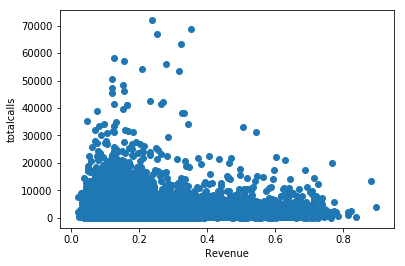

In [429]:
plt.scatter(data1['totrev'],data1['totcalls'])
plt.xlabel('Revenue')
plt.ylabel('totalcalls')


Text(0, 0.5, 'Overage monthly')

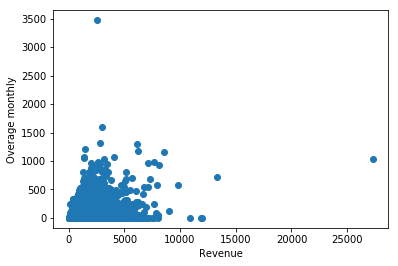

In [433]:
plt.scatter(data['totrev'],data['ovrmou_Mean'])
plt.xlabel('Revenue')
plt.ylabel('Overage monthly')

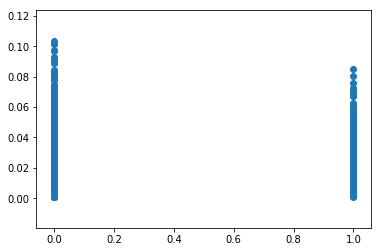

In [409]:
scatter(data1['churn'],data1['avgrev'])

In [408]:
data['avgrev'].describe()

count    13259.000000
mean        58.029555
std         36.793601
min          1.100000
25%         35.340000
50%         49.840000
75%         70.065000
max        902.380000
Name: avgrev, dtype: float64